In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/EDA/vgsalesGlobale.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Handling Missing Values

In [6]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


<Axes: title={'center': 'Missing Values'}>

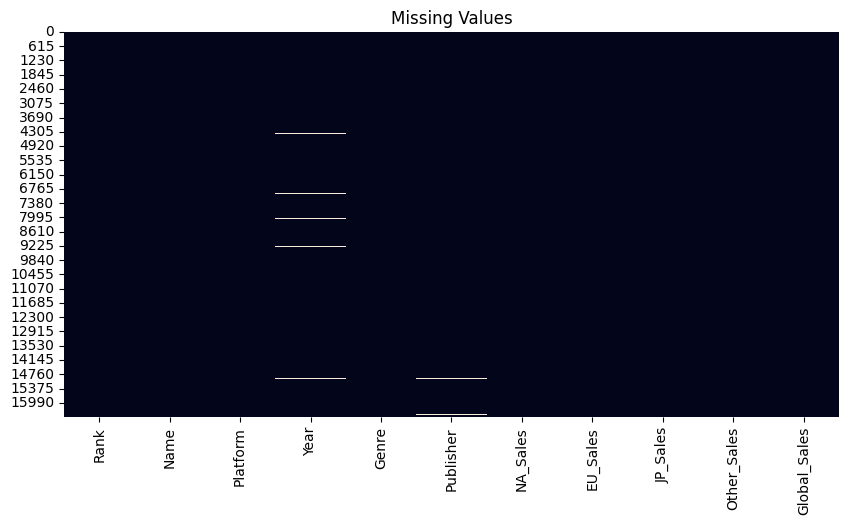

In [7]:
plt.figure(figsize=(10,5))
plt.title("Missing Values")
sns.heatmap(df.isnull(),cbar=False)

## Data Cleaning

In [8]:
# fill the missing values of Year and Publisher
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)


<ipython-input-8-7b6badc3bd3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mode()[0], inplace=True)
<ipython-input-8-7b6badc3bd3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [9]:
# check missing values again
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## some visualization of data

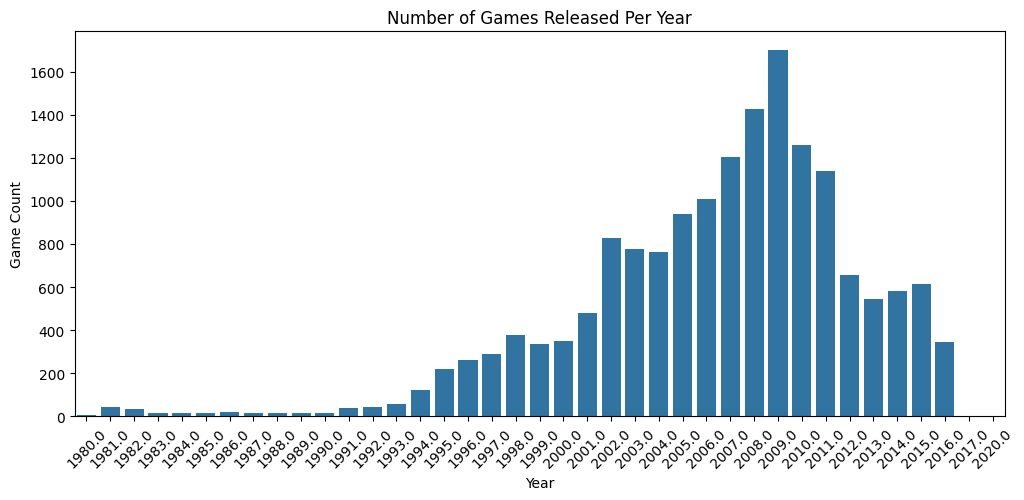

In [11]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Year', data=df)
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Game Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Draw the pie chart which show Platform Distribution
import plotly.express as px

fig = px.pie(df, names='Platform', title='Platform Distribution')
fig.show()

In [15]:
fig_2 = px.bar(df, x='Genre', color='Genre', barmode='group', title='Genre Distribution')
fig_2.show()

In [19]:
"""
# Histogram for multiple classes
sales_df = df[['NA_Sales','EU_Sales', 'JP_Sales']]

# Melt the Dataframe to long Format  (Melt : Convert columns into rows with labels)
sales_melted = sales_df.melt(var_name = 'Region', value_name = 'Sales')

# Plot the histogram
fig_3 = px.histogram(sales_melted, x='Sales', color='Region',barmode='overlay', title='Sales Distribution by Region (NA, EU, JP)')

fig_3.show() """

"\n# Histogram for multiple classes\nsales_df = df[['NA_Sales','EU_Sales', 'JP_Sales']]\n\n# Melt the Dataframe to long Format  (Melt : Convert columns into rows with labels)\nsales_melted = sales_df.melt(var_name = 'Region', value_name = 'Sales')\n\n# Plot the histogram\nfig_3 = px.histogram(sales_melted, x='Sales', color='Region',barmode='overlay', title='Sales Distribution by Region (NA, EU, JP)')\n\nfig_3.show() "